####A)Nivel Segmento/Estado: Seleccione los datos correspondientes a un paciente y un canal, y para él defina un conjunto de datos para cada estado presente en el dataset. Para cada uno de ellos estudie los siguientes elementos y luego compárelos.

#####a) A partir de la frecuencia de muestreo previamente determinada y usando el teorema de Nyquist (f NQ = f o /2). ¿Qué frecuencia máxima pudo ser registrada en los datos disponibles?

La frecuencia maxima que pudo ser registrada con los datos disponibles es 100 Hz ya que es 200Hz/2 por el teorema de nyquist.

#####b) Compute y grafique la densidad espectral de potencia para cada segmento. Elija las escalas apropiadas para su visualización (qué magnitudes están graficando? corresponde el uso de decibeles?).

Se esta graficando la frecuencia en el eje x como variable independiente y la densisdad espectral en el eje y como variable dependiente refiriendose a la energia presente en cada frecuencia.

En este caso filtramos la señal de 50 Hz y la continúa. No hace falta el uso de decibeles en las visualizaciones ya que los filtros van a retirar las frecuencias que nos generan ruido. En los casos donde se quiera mantener estas frecuencias más preponderantes corresponde el uso de decibeles para una correcta visualización de los datos.



#####c) Determine la/las frecuencias con mayor presencia en cada caso. ¿Qué puede concluir con esta nueva información? ¿Encuentra diferencias en este aspecto entre los tramos 99 y los tramos 1-2? ¿Hay frecuencias no asociadas con el fenómeno a detectar?

Para realizar dicho gráfico las señales fueron filtradas con un filtro pasa banda Butterworth entre 8 Hz y 20 Hz para representar mejor las frecuencias de interés, eliminando todo ruido que pueda llegar a tener como el de la continúa a 0 Hz y el de la transmisión de luz a 50 HZ.

En estos casos hay mayor presencia de las frecuencias en estudio para las etiquetas 1 (12,5 Hz) y para las etiquetas 2 (16,5 Hz). También se pudieron observar en algunos canales la presencia de los armónicos de dichas frecuencias (25 HZ para etiqueta 1 y 33 Hz para etiqueta 2), pero estos no aparecen siempre. A su vez cabe destacar que no en todos los canales se observa la misma amplitud de voltaje en las frecuencias fundamentales. Se visualiza que aparecen amplitudes en frecuencias cercanas a las fundamentales ingresando ruido al sistema por el que fue filtrado posteriormente para una mejor visualización. Para el caso de las etiquetas 99 no se observa una frecuencia fundamental de estudio.


#####d) ¿Es útil el concepto de outliers o conviene usar otros criterios? ¿Se pueden descartar señales?

En el análisis de frecuencias al realizar el filtrado en las frecuencias de interés no es útil el concepto de outliers ya que primero todos los datos de esas frecuencias son relevantes para el estudio y segundo que si se retiran muestras como outliers puede llegar a producir saltos bruscos en la frecuencia generando ruido en la señal.


#####e) Comparar en el dominio del tiempo las señales con y sin filtrado de frecuencias indeseadas. ¿Qué diferencias encuentra?

Se observa que la filtrada es muy similar a una gaussiana, y la sin filtrar primero que tiene la componente de continua que hace que los valores están muy por encima de los rangos normales siendo un artefacto de la adquisición y segundo que su distribución tiende a una bimodal.


In [1]:
import io
import matplotlib                   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
import scipy 
import math
from sklearn.linear_model import LinearRegression
from csv import reader
from scipy import signal
import itertools
import os

plt.style.use('ggplot')
%matplotlib inline
sns.set_context('talk')
sns.set_palette('pastel') 

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Al ejecutar el código, se mostrará un link, al cual se debe acceder 
# con la cuenta de correo (personal) autorizada en el drive compartido

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    return GoogleDrive(gauth)

def read_csv_from_drive(drive, id, filename, skiprows=None, names=None):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(filename)  
    return pd.read_csv(filename, skiprows=skiprows, names=names)

drive = connect_to_drive()

In [3]:
columns_names = ["num_muestra","canal1","canal2","canal3","canal4","acelero1","acelero2","acelero3","etiqueta","marca_temporal","marc_temp_sw"]
delete_rows= 10

df_AA0 = read_csv_from_drive(drive, '1rC224X_cyTLIJFeY0vj3_6A85YwFVztX' , 'AA_0_-_2020-10-28.csv', skiprows=None, names=columns_names)
df_AA1 = read_csv_from_drive(drive, '1nfYbsq3AefNxLPZFwaLMEkWqlEDshdbp' , 'AA_1_-_2020-11-24.csv', skiprows=delete_rows, names=columns_names)
df_AA2 = read_csv_from_drive(drive, '1X4xCoXB36EvT4roR4XbwWLzB9fFUq9-2' , 'AA_2_-_2020-11-24.csv', skiprows=delete_rows, names=columns_names)

df_HA1 = read_csv_from_drive(drive, '1bnM3or_5nxAJFvnMV0HlDrrq6iH4fZCd' , 'HA_1_-_2020-11-24.csv', skiprows=delete_rows, names=columns_names)

df_JA1 = read_csv_from_drive(drive, '1y5P7NJdVn0_CgVAQmAfoMeirv4EYX8tR' , 'JA_1_-_2020_-_11-19.csv', skiprows=delete_rows, names=columns_names)
df_JA2 = read_csv_from_drive(drive, '1mtqwOfqCfeQ-L_c7ndlwMqLv6q4mi1je' , 'JA_2_-_2020-11-24.csv', skiprows=delete_rows, names=columns_names)

df_MA1 = read_csv_from_drive(drive, '19pVv_vpsDTm2kHdi1pS2ESVb2DYwBdUn' , 'MA_1_-_2020-12-18.csv', skiprows=delete_rows, names=columns_names)

In [4]:
def has_metadata(csv_path):
    f = open(csv_path, newline='')
    csv_reader = reader(f)
    return True if next(csv_reader)[0] == '%OpenBCI Raw EEG Data' else False


def clean_dataset(dataset):
  dataset.drop(columns=["num_muestra",'acelero1','acelero2','acelero3',"marca_temporal",'marc_temp_sw'], inplace=True)
  return dataset

def add_time(dataset):
  sample_rate = 200.
  dataset['time'] = dataset.index.values/sample_rate
  return dataset

def add_sub_label(dataset):
    labels = dataset.etiqueta.unique().tolist()
    for etiqueta in labels:
        sample_idx = dataset.loc[dataset.etiqueta==etiqueta].index.values
        gap_btn_idx = sample_idx[1:] - sample_idx[:-1]
        selected_idx = np.insert((gap_btn_idx != 1), 0, True)
        desired_idx_bottom = sample_idx[selected_idx]
        selected_idx = np.append(selected_idx[1:],True)
        desired_idx_top = sample_idx[selected_idx]
        for k, (start, stop) in enumerate(zip(desired_idx_bottom, desired_idx_top)):
            selection = (dataset.index.values >= start) & (dataset.index.values <= stop)
            dataset.loc[selection, 'sub_label'] = f'{etiqueta}-{k}'
    return dataset

In [5]:
#elimino las columnas que no me sirven
dfs = [df_AA0, df_AA1, df_AA2, df_HA1, df_JA1, df_JA2, df_MA1]
for d in dfs:
  clean_dataset(d)

In [6]:
#agrego la columna tiempo en funcion del indice y de la tasa de muestreo conocida
for d in dfs:
  add_time(d)

In [7]:
df_AA2

,canal1,canal2,canal3,canal4,etiqueta,time
0,1698.27,721.51,1778.40,1771.82,99,0.000
1,1759.80,775.99,1817.29,1823.40,99,0.005
2,1625.73,657.79,1736.31,1717.40,99,0.010
3,1540.47,537.86,1692.34,1637.11,99,0.015
4,1714.80,727.68,1792.99,1786.76,99,0.020
...,...,...,...,...,...,...
110379,1911.81,1102.29,2148.64,2044.66,99,551.895
110380,1888.66,1080.94,2133.99,2017.54,99,551.900
110381,1902.98,1077.20,2140.45,2012.79,99,551.905
110382,1911.79,1104.02,2166.83,2047.55,99,551.910


In [8]:
#Se identifica cada intervalo de cada etiqueta presente en cada registro:
for d in dfs:
  d = add_sub_label(d)
  d.drop_duplicates(subset=['etiqueta', 'sub_label'])

In [9]:
df_AA2

,canal1,canal2,canal3,canal4,etiqueta,time,sub_label
0,1698.27,721.51,1778.40,1771.82,99,0.000,99-0
1,1759.80,775.99,1817.29,1823.40,99,0.005,99-0
2,1625.73,657.79,1736.31,1717.40,99,0.010,99-0
3,1540.47,537.86,1692.34,1637.11,99,0.015,99-0
4,1714.80,727.68,1792.99,1786.76,99,0.020,99-0
...,...,...,...,...,...,...,...
110379,1911.81,1102.29,2148.64,2044.66,99,551.895,99-19
110380,1888.66,1080.94,2133.99,2017.54,99,551.900,99-19
110381,1902.98,1077.20,2140.45,2012.79,99,551.905,99-19
110382,1911.79,1104.02,2166.83,2047.55,99,551.910,99-19


In [10]:
#se realiza una funcion para graficar los espectros de frecuencia
def plot_spectral(signal, dt,name, freq_lim=None, amp_lim=None):
    N = signal.shape[0]
    T = N*dt
    
    fft = np.fft.rfft(signal)
    Sxx = ((2*dt**2)/T)*fft*fft.conj()
    
    freqs = np.fft.rfftfreq(n=N, d=dt)
    
    fig, axs = plt.subplots(1,1)
    fig.set_figwidth(10)
    
    axs.plot(freqs, Sxx)
    axs.set_ylabel("Spectral Density [$uV^2$/Hz]")
    axs.set_xlabel("Freq [Hz]")
    axs.set_title("Frequency Spectrum of Signal "+ name)
    axs.set_xlim(freq_lim)
    axs.set_ylim(amp_lim)

In [11]:
dfs_names = ['AA0', 'AA1', 'AA2', 'HA1', 'JA1', 'JA2', 'MA1']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

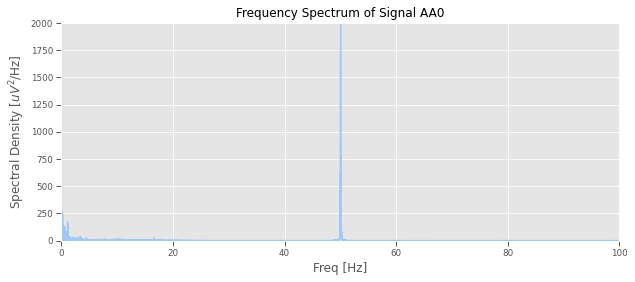

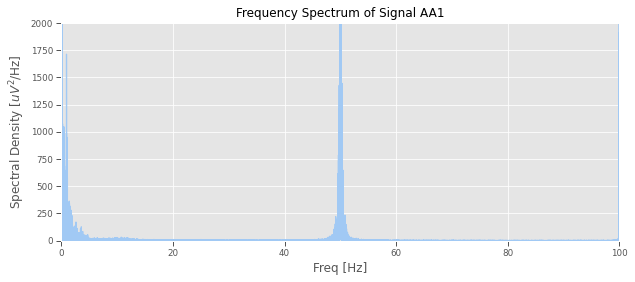

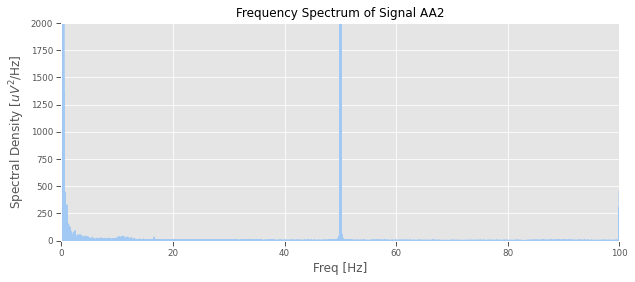

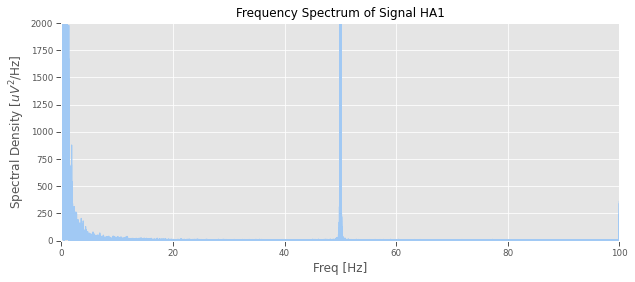

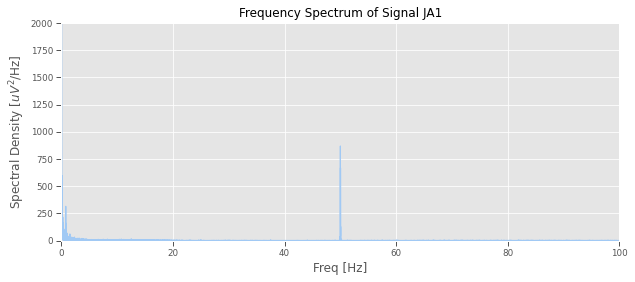

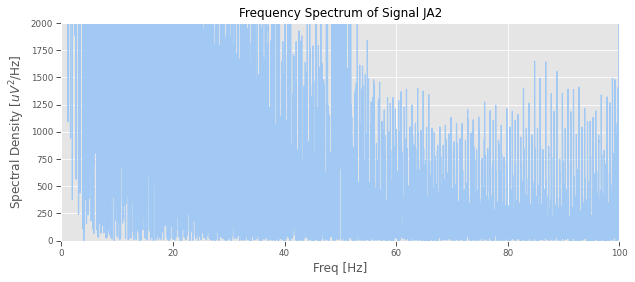

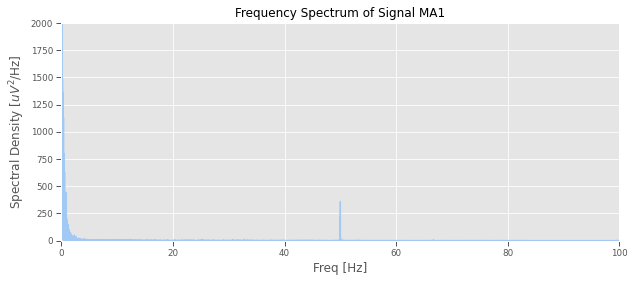

In [12]:
#La ponemos a prueba
dt=1/200
i=0
for d in dfs:
  plot_spectral(d['canal1'], dt=dt, freq_lim=(0,100), amp_lim=(0,2000), name=dfs_names[i])
  i=i+1


vemos la gran componente en frecuencia en los 50 HZ y en la continua

In [13]:
labels = df_AA2.pop("etiqueta").values

sig_np = df_AA2.values.T

In [14]:
sig_np.shape

(6, 110384)

In [15]:
#determino el primer valor de una etiqueta para con este dato y sabiendo que se tienen 2000 muestras del mismo poder tomar un solo estado
def detect_first_label(labels_array, label_to_detect):
    for i in range(labels_array.shape[0]):
        if labels_array[i] == label_to_detect:
            return i


In [16]:
label_one = detect_first_label(labels, 1)
print("Checking:", labels[label_one-3:label_one+4])
label_two = detect_first_label(labels, 2)
print("Checking:", labels[label_two-3:label_two+4])

Checking: [99 99 99  1  1  1  1]
Checking: [99 99 99  2  2  2  2]


In [17]:
#busco evaluar cuantos valores continuos tienen la misma etiqueta para corroborar que solo se tomen valores de una etiqueta
def detect_range_label(labels_array, label_to_detect):
  j=0
  flag=0
  for i in range(labels_array.shape[0]):
    if labels_array[i] == label_to_detect:
      j=j+1
      flag=1
      if labels_array[i] != labels_array[i+1]:
        flag=0
    elif flag==0 and j!=0:
      return j

In [18]:
label_one_range = detect_range_label(labels, 1)
label_one_range

2105

In [19]:
label_two_range = detect_range_label(labels, 2)
label_two_range

2103

In [20]:
sig_np.shape[0]

6

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


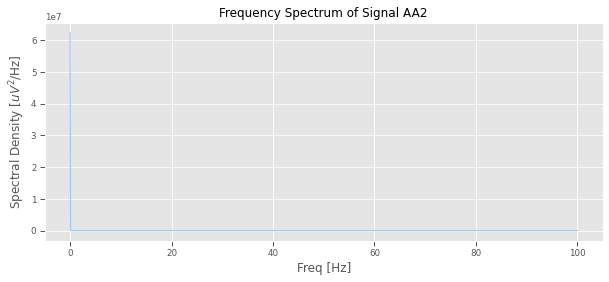

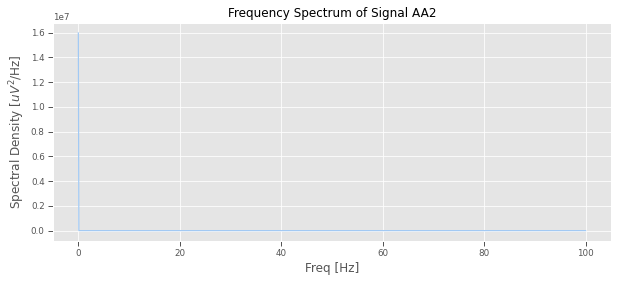

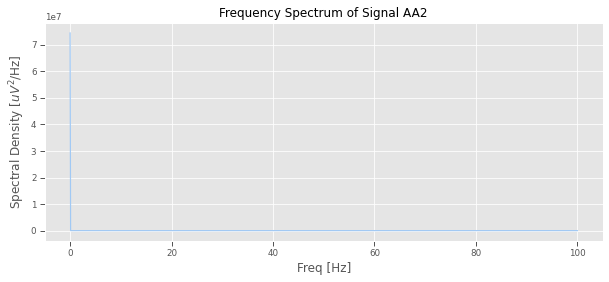

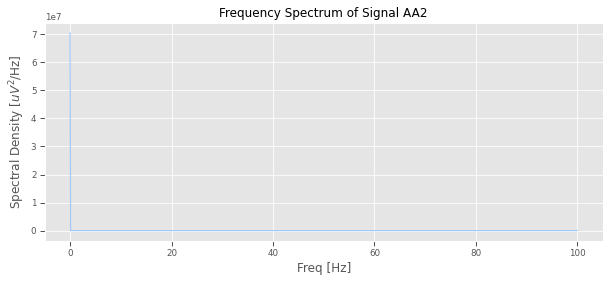

In [21]:

#solo se grafica los valores de etiqueta 1 en una sola muestra en sus 4 canales 
for ch in range(4):
    plot_spectral(sig_np[ch, label_one:label_one+2000], dt=dt, freq_lim = None, amp_lim =None,name='AA2')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


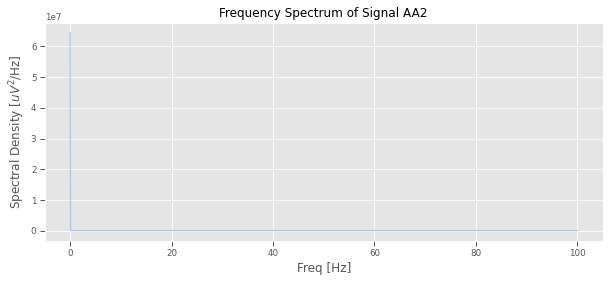

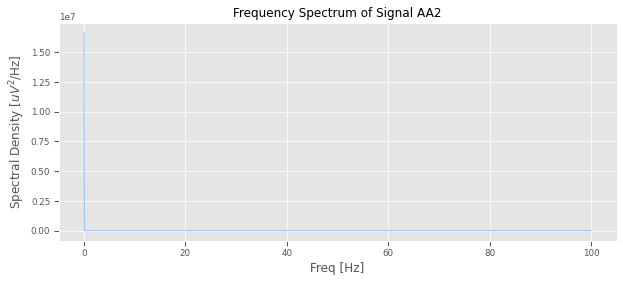

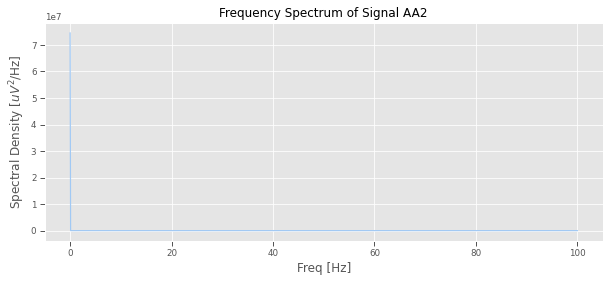

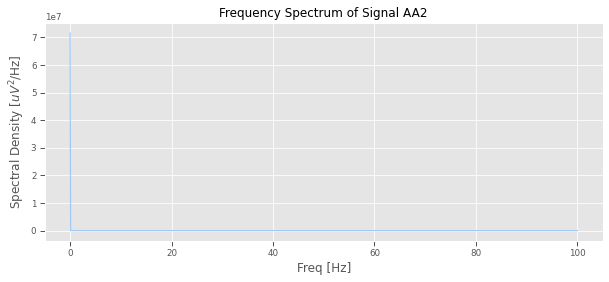

In [22]:
#graficamos lo mismo para la etiqueta 2
for ch in range(4):
    plot_spectral(sig_np[ch, label_two:label_two+2000], dt=dt, freq_lim = None, amp_lim =None,name='AA2')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


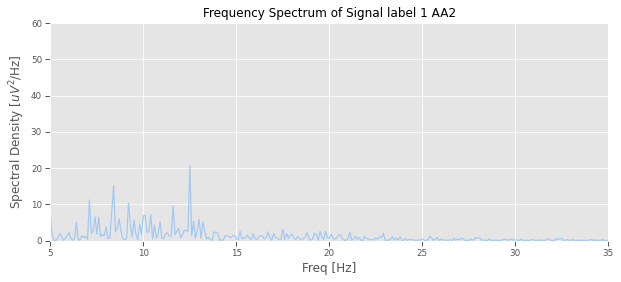

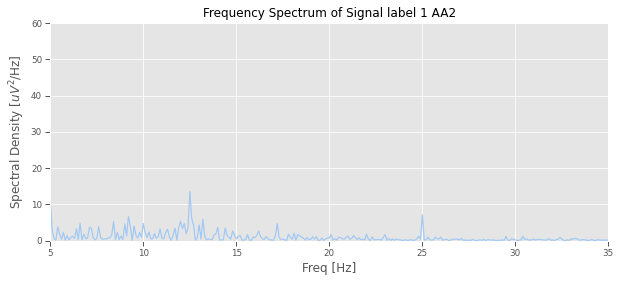

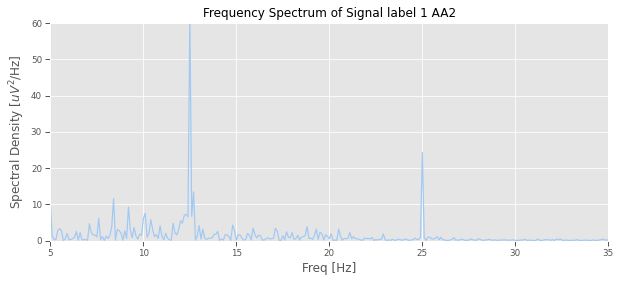

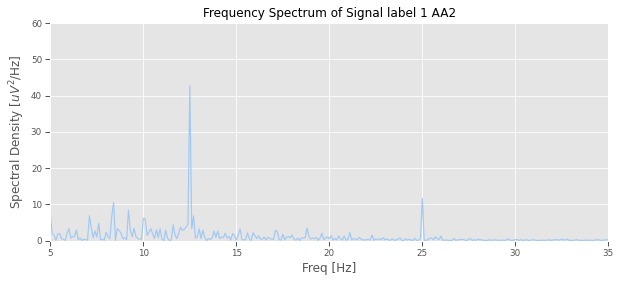

In [23]:
#filtro la senal en una frecuencia de 5 a 35 hz y una amplitud hasta 25 microvolt aunque solo por limites del grafico ya que la senal no
#esta filtrada teoricamente (se hace el filtrado luego)
for ch in range(4):
    plot_spectral(sig_np[ch, label_one:label_one+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0,60),name='label 1 AA2')

se pueden ver los picos en los valores de frecuencia 12,5 hz y en su armonico 25 hz que son los de la etiqueta 1.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


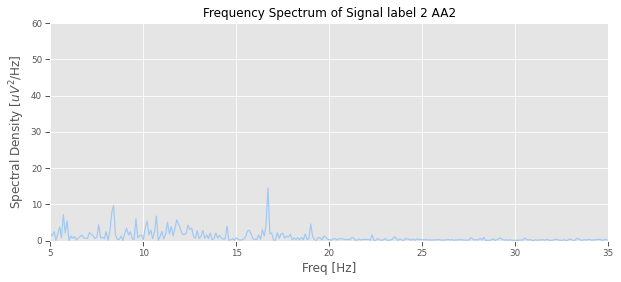

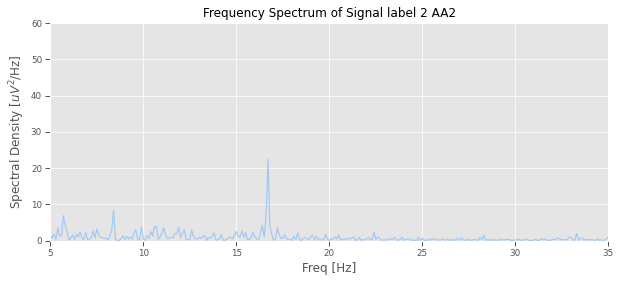

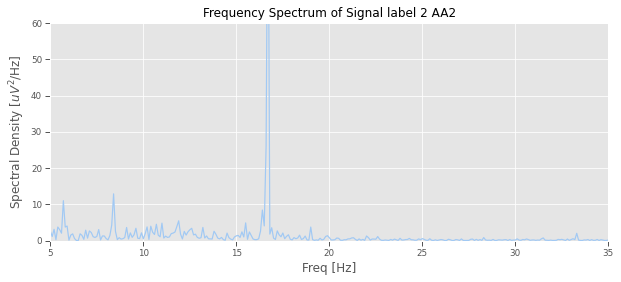

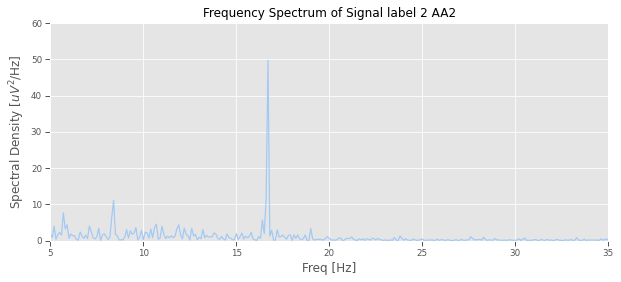

In [24]:
for ch in range(4):
    plot_spectral(sig_np[ch, label_two:label_two+2000], dt=dt, freq_lim = (5, 35), amp_lim=(0,60),name='label 2 AA2')

Aca vemos los picos en la frecuencia 16,5 hz aunque no tanto para su armonico (33 Hz)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


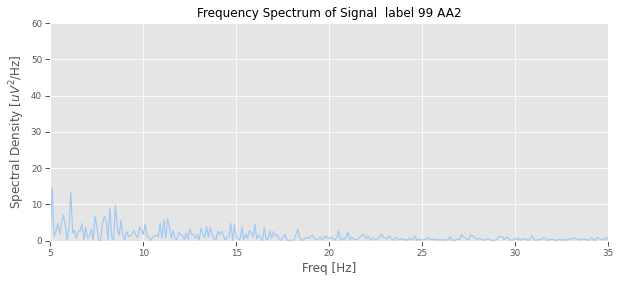

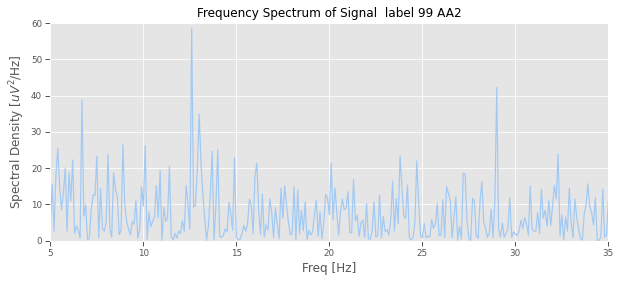

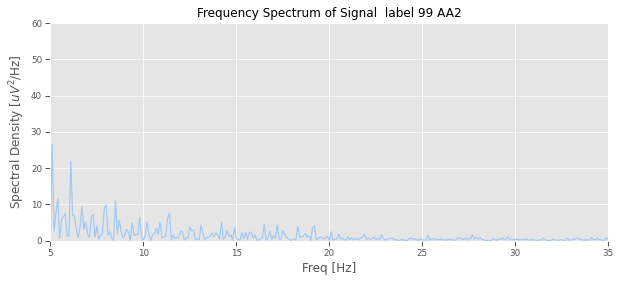

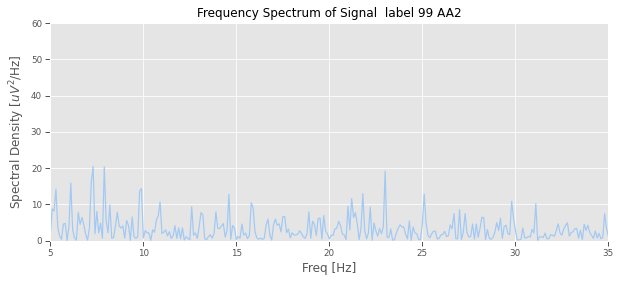

In [25]:
#grafico los valores 99
for ch in range(4):
    plot_spectral(sig_np[ch, 0:2000], dt=dt, freq_lim = (5, 35), amp_lim=(0,60),name=' label 99 AA2')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


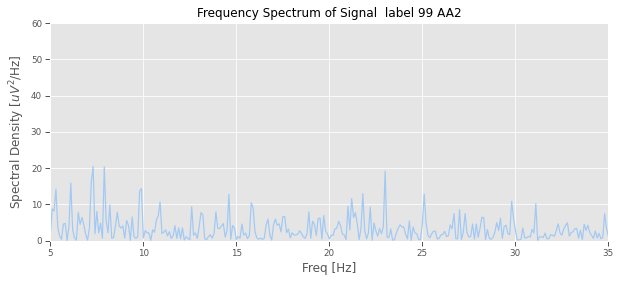

In [26]:
plot_spectral(sig_np[3, 0:2000], dt=dt, freq_lim = (5, 35), amp_lim=(0,60),name=' label 99 AA2')

Se ve que no hay una frecuencia marcada con mayor amplitud para alguno de los canales sino que es mas un ruido en todas las frecuencias.

Tambien se observa que no se puede realizar el estudio en funcion de sus armonicos ya que estos no aparecen en todas las senales, por ende luego se las decide filtrar.

In [27]:
#genero una funcion para graficar las tres senales en simultaneo de un mismo canal
def plot_three_spectral(signal_1,signal_2,signal_3,label_1,label_2,label_3, dt,name, freq_lim=None, amp_lim=None):
    N = signal_1.shape[0]
    T = N*dt
    
    fft_1 = np.fft.rfft(signal_1)
    Sxx_1 = ((2*dt**2)/T)*fft_1*fft_1.conj()

    fft_2 = np.fft.rfft(signal_2)
    Sxx_2 = ((2*dt**2)/T)*fft_2*fft_2.conj()

    fft_3 = np.fft.rfft(signal_3)
    Sxx_3 = ((2*dt**2)/T)*fft_3*fft_3.conj()
    
    freqs = np.fft.rfftfreq(n=N, d=dt)
    
    fig, axs = plt.subplots(1,1)
    fig.set_figwidth(10)
    
    axs.plot(freqs, Sxx_1,color='blue', label= label_1)
    axs.plot(freqs, Sxx_2,color='red', label= label_2)
    axs.plot(freqs, Sxx_3,color='green', label= label_3)
    axs.set_ylabel("Spectral Density [$uV^2$/Hz]")
    axs.set_xlabel("Freq [Hz]")
    axs.set_title("Frecuencia vs Densidad espectral, "+ name)
    axs.set_xlim(freq_lim)
    axs.set_ylim(amp_lim)
    axs.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


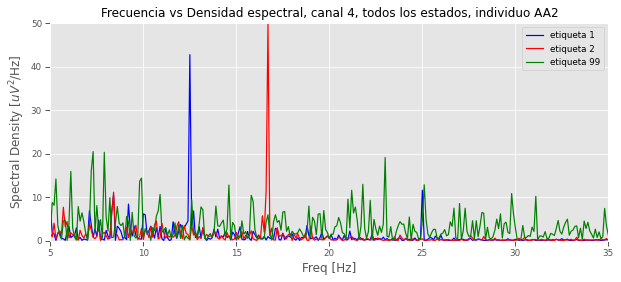

In [28]:
plot_three_spectral(sig_np[3, label_one:label_one+2000],sig_np[3, label_two:label_two+2000] ,sig_np[3, 0:2000],
                  label_1='etiqueta 1',label_2='etiqueta 2',label_3='etiqueta 99',dt=dt, freq_lim = (5,35), amp_lim=(0,50), 
                  name='canal 4, todos los estados, individuo AA2')

In [29]:
#Para el filtrado usamos el paquete signal de la librería scipy
from scipy import signal as sgn


sf = 200 #Frecuencia de muestreo
f_nq = sf/2 #Para crear el filtro debemos pasar la frecuencia a la que queremos filtrar (frecuencia crítica) divido la frecuencia de Nyquist
order = 4 #el orden de un filtro es básicamente cuan "fuerte" el mismo se aplica

b, a = sgn.iirfilter(N=order, Wn=7/f_nq, btype="highpass", ftype="butter") #en Wn pongo la frecuencia desde la cual quiero que sea pasa alto

#Habiendo creado el filtro, lo aplicamos con la función filtfilt

sig_filt = sgn.filtfilt(b, a, sig_np[0:4], axis=-1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


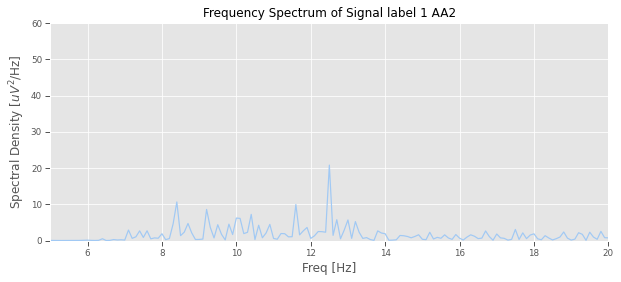

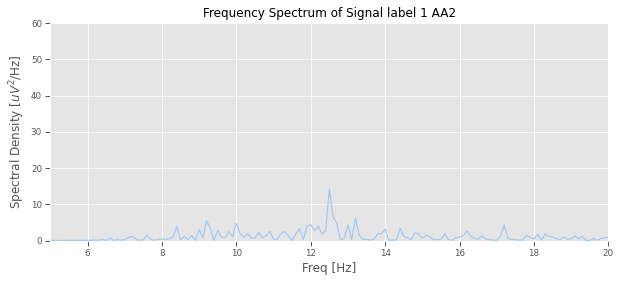

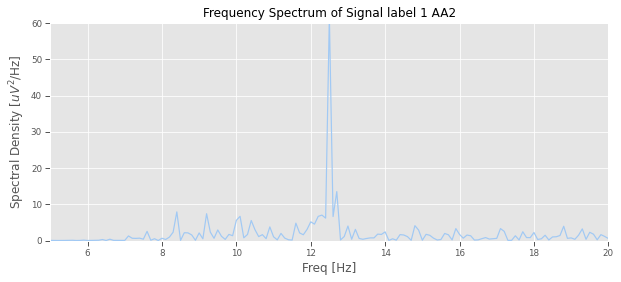

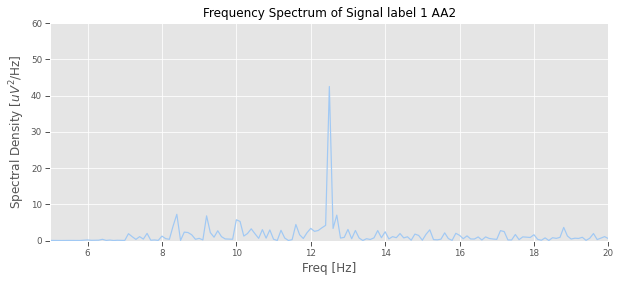

In [30]:
#grafico los canales filtrados de la etiqueta 1
for ch in range(4):
  plot_spectral(sig_filt[ch, label_one:label_one+2000], dt=dt, freq_lim = (5, 20), amp_lim=(0, 60), name='label 1 AA2')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


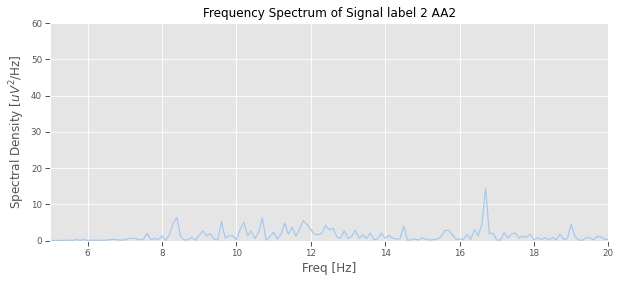

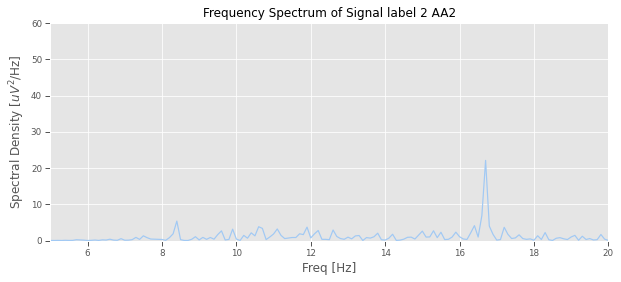

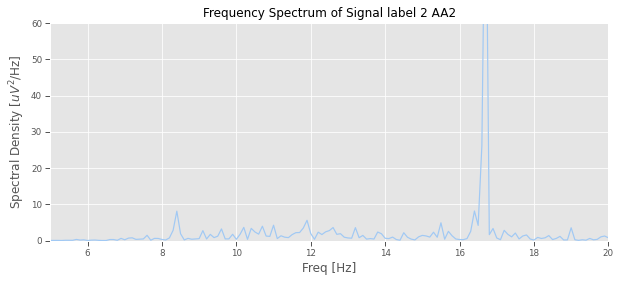

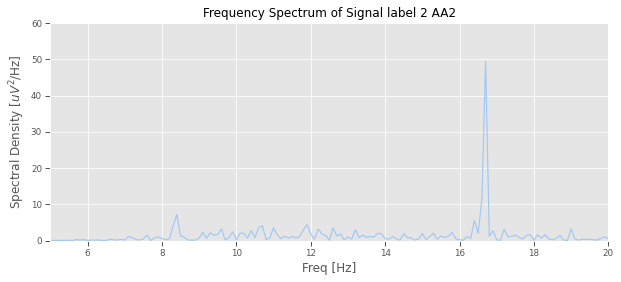

In [31]:
#grafico los canales filtrados de la etiqueta 2
for ch in range(4):
  plot_spectral(sig_filt[ch, label_two:label_two+2000], dt=dt, freq_lim = (5, 20), amp_lim=(0, 60), name='label 2 AA2')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


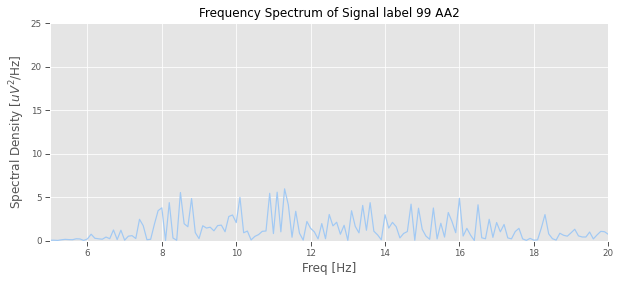

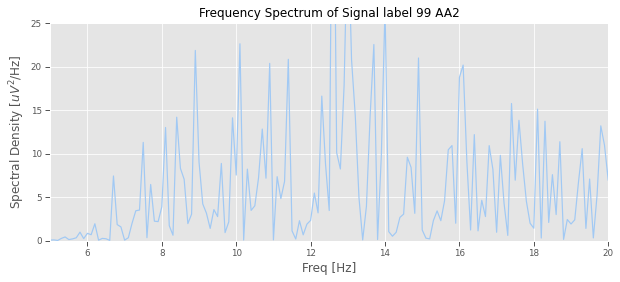

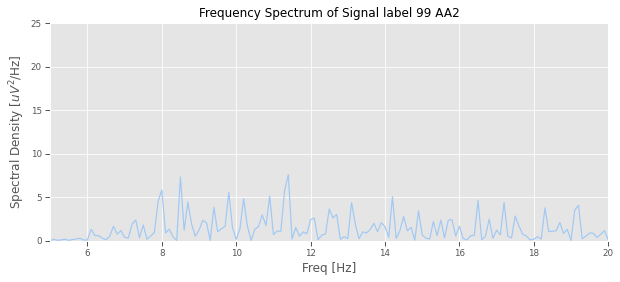

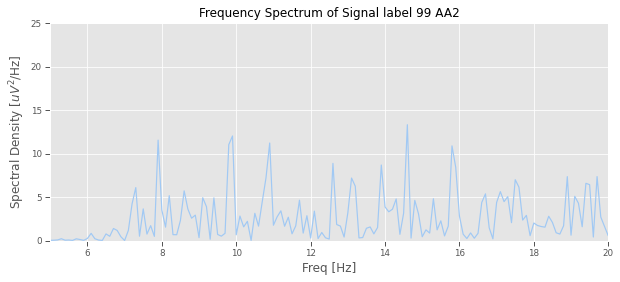

In [32]:
#grafico los canales filtrados de la etiqueta 99
for ch in range(4):
  plot_spectral(sig_filt[ch, 0:2000], dt=dt, freq_lim = (5, 20), amp_lim=(0, 25), name='label 99 AA2')


In [33]:
#se realiza una funcion para filtrar las senales.
def  filt_signal(sig_np,f_low,f_high):

#primero le aplicamos un filtro notch elimina banda para la frecuencia de transmision electrica (50 Hz)
  sf = 200 #Frecuencia de muestreo
  Q=30 #calidad del filtro, indica cuán fuerte se filtra
  f_notch = 50 #valor que elimino

  b, a = sgn.iirnotch(w0=f_notch, Q=Q, fs=sf)
  sig_notch = sgn.filtfilt(b, a, sig_np[0:4])

#Ahora creamos el filtro pasabanda Butterworth

  f_nq = sf/2
  f_low = f_low #dependiendo la senal a filtrar le cambio los valores del pasabanda
  f_high = f_high
  order = 4

  b, a = sgn.iirfilter(N=order, Wn=[f_low/f_nq, f_high/f_nq], btype="bandpass", ftype="butter")
  sig_filt = sgn.filtfilt(b, a, sig_notch)
  return sig_filt




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


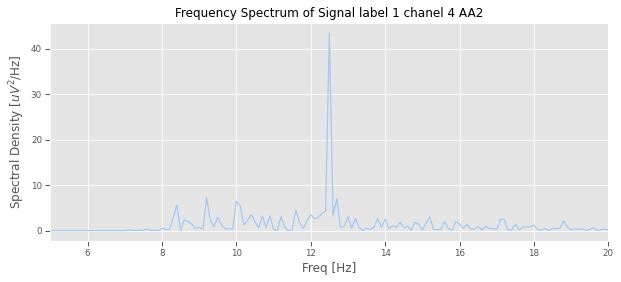

In [34]:
sig_filt_1=filt_signal(sig_np,8,20)
#veamos ahora la señal final
plot_spectral(sig_filt_1[3, label_one:label_one+2000], dt=dt, freq_lim = (5,20), amp_lim=None, name='label 1 chanel 4 AA2')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


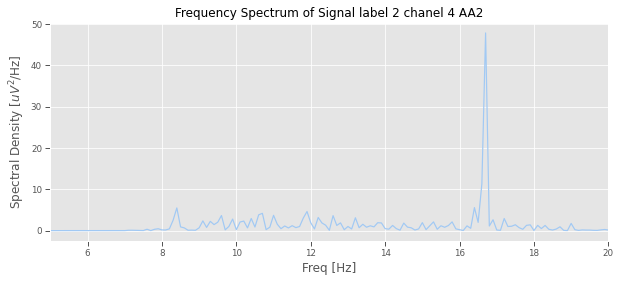

In [35]:
sig_filt_2=filt_signal(sig_np,8,20)

plot_spectral(sig_filt_2[3, label_two:label_two+2000], dt=dt, freq_lim = (5,20), amp_lim=None, name='label 2 chanel 4 AA2')

In [36]:
#genero una funcion para graficar las dos senales en simultaneo
def plot_two_spectral(signal_1,signal_2, dt,name, freq_lim=None, amp_lim=None):
    N = signal_1.shape[0]
    T = N*dt
    
    fft_1 = np.fft.rfft(signal_1)
    Sxx_1 = ((2*dt**2)/T)*fft_1*fft_1.conj()

    fft_2 = np.fft.rfft(signal_2)
    Sxx_2 = ((2*dt**2)/T)*fft_2*fft_2.conj()
    
    freqs = np.fft.rfftfreq(n=N, d=dt)
    
    fig, axs = plt.subplots(1,1)
    fig.set_figwidth(10)
    
    axs.plot(freqs, Sxx_1,color='blue', label= 'etiqueta 1')
    axs.plot(freqs, Sxx_2,color='red', label= 'etiqueta 2')
    axs.set_ylabel("Spectral Density [$uV^2$/Hz]")
    axs.set_xlabel("Freq [Hz]")
    axs.set_title("Frecuencia vs Densidad espectral, canal 4, ambos estados (12,5 Hz, 16,5 Hz), individuo "+ name)
    axs.set_xlim(freq_lim)
    axs.set_ylim(amp_lim)
    axs.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


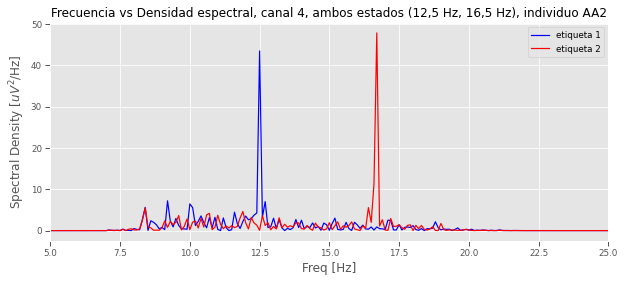

In [37]:
plot_two_spectral(sig_filt_1[3, label_one:label_one+2000],sig_filt_2[3, label_two:label_two+2000] ,dt=dt, 
                  freq_lim = (5,25), amp_lim=None, name='AA2')

In [38]:
N = sig_filt_2[3, label_two:label_two+2000].shape[0]
T = N*dt
    
fft_1 = np.fft.rfft(sig_filt_2[3, label_two:label_two+2000])
Sxx_1 = ((2*dt**2)/T)*fft_1*fft_1.conj()
freqs = np.fft.rfftfreq(n=N, d=dt)
#fig, axs = plt.subplots(1,1)
#fig.set_figwidth(10)
    
#axs.scatter(freqs, Sxx_1,color='blue', label= 'etiqueta 1')
#axs.set_xlim(5,25)

In [39]:
#guardo los valores de las transformadas en una variable para luego realizar la inversa. utilizo canal 3
fft_label_1 = np.fft.rfft(sig_filt_1[3, label_two:label_two+2000])
fft_label_2 = np.fft.rfft(sig_filt_2[3, label_one:label_one+2000])

In [40]:
#realizo la antitransformada para ver los datos en el tiempo
ifft_label_1=np.fft.irfft(fft_label_1)
ifft_label_2=np.fft.irfft(fft_label_2)

Text(0.5, 0, 'Voltage [uV]')

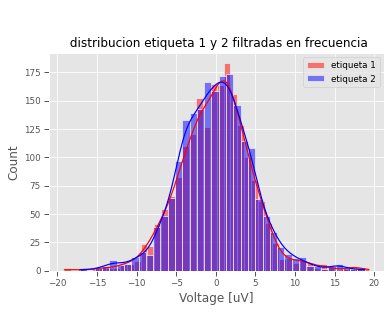

In [41]:

ax=sns.histplot( x=ifft_label_1,kde=True, color='red', label='etiqueta 1')
ax.set_title("\n\n distribucion etiqueta 1 y 2 filtradas en frecuencia")
sns.histplot( x=ifft_label_2,kde=True, color='blue', label='etiqueta 2')
ax.legend()
ax.set_xlabel('Voltage [uV]')

In [42]:
#pruebo sin hacer la transformada
sig_array_1=sig_filt_1[3, label_one:label_one+2000].astype(float)
sig_array_2=sig_filt_2[3, label_two:label_two+2000].astype(float)

Text(0.5, 0, 'Voltage [uV]')

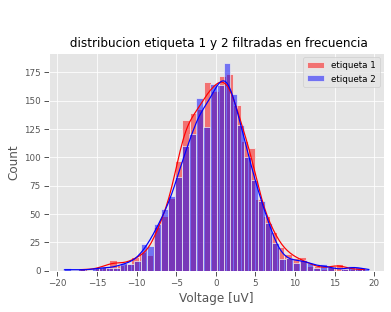

In [43]:

ax=sns.histplot( x=sig_array_1,kde=True, color='red', label='etiqueta 1')
ax.set_title("\n\n distribucion etiqueta 1 y 2 filtradas en frecuencia")
sns.histplot( x=sig_array_2,kde=True, color='blue', label='etiqueta 2')
ax.legend()
ax.set_xlabel('Voltage [uV]')

In [44]:
#guardo los valores de las etiquetas sin filtrar
etiqueta_1_AA2=df_AA2[df_AA2['sub_label']=='1-0'].index
etiqueta_2_AA2=df_AA2[df_AA2['sub_label']=='2-0'].index

etiqueta_1_AA2=df_AA2[df_AA2['sub_label']=='1-0'].index
etiqueta_2_AA2=df_AA2[df_AA2['sub_label']=='2-0'].index


Text(0.5, 0, 'Voltage [uV]')

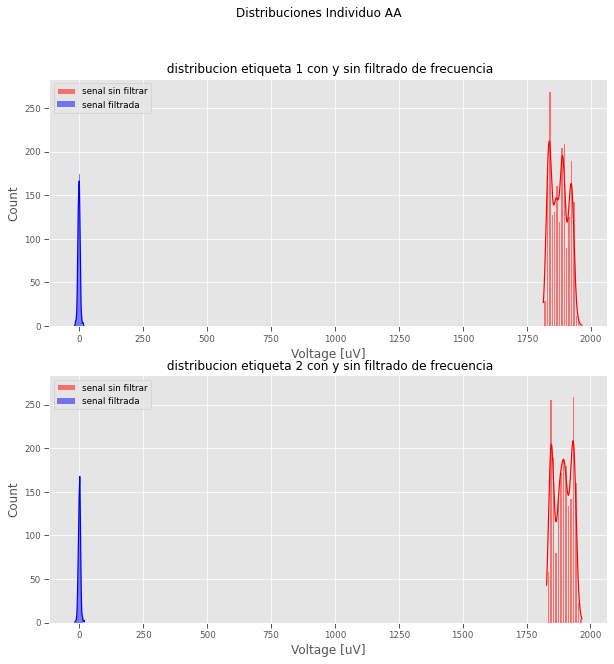

In [45]:
fig, axes = plt.subplots(2,  figsize=(10, 10),sharex=False,sharey=True)
fig.suptitle('Distribuciones Individuo AA')
muestras=2000

sns.histplot(ax=axes[0], x=df_AA2['canal4'].iloc[etiqueta_1_AA2[0:muestras]],kde=True, color='red', label='senal sin filtrar')
axes[0].set_title("\n\n distribucion etiqueta 1 con y sin filtrado de frecuencia")
sns.histplot(ax=axes[0], x=sig_array_1,kde=True, color='blue', label='senal filtrada')
#axes[0, 1].set_title("\n\n distribucion etiqueta 1 con filtrado de frecuencia")

sns.histplot(ax=axes[1], x=df_AA2['canal4'].iloc[etiqueta_2_AA2[0:muestras]],kde=True, color='red', label='senal sin filtrar')
axes[1].set_title("\n\n distribucion etiqueta 2 con y sin filtrado de frecuencia")
sns.histplot(ax=axes[1], x=sig_array_2 ,kde=True, color='blue',label='senal filtrada')
#axes[1, 1].set_title("\n\n distribucion etiqueta 2 con filtrado de frecuencia")

axes[0].legend()
axes[0].set_xlabel('Voltage [uV]')
axes[1].legend()
axes[1].set_xlabel('Voltage [uV]')

Text(0.5, 1.0, '\n\n distribucion etiqueta 2 con filtrado de frecuencia')

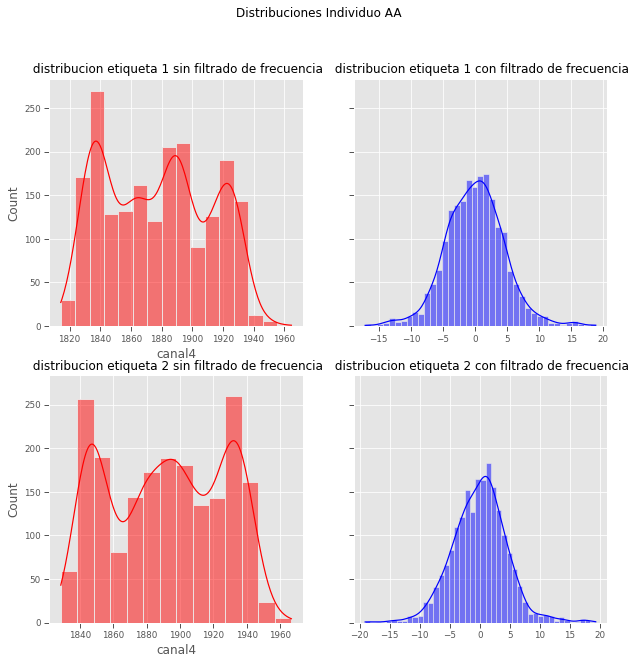

In [46]:
fig, axes = plt.subplots(2,2,  figsize=(10, 10),sharex=False,sharey=True)
fig.suptitle('Distribuciones Individuo AA')
muestras=2000

sns.histplot(ax=axes[0,0], x=df_AA2['canal4'].iloc[etiqueta_1_AA2[0:muestras]],kde=True, color='red')
axes[0,0].set_title("\n\n distribucion etiqueta 1 sin filtrado de frecuencia")
sns.histplot(ax=axes[0,1], x=sig_array_1,kde=True, color='blue')
axes[0, 1].set_title("\n\n distribucion etiqueta 1 con filtrado de frecuencia")

sns.histplot(ax=axes[1,0], x=df_AA2['canal4'].iloc[etiqueta_2_AA2[0:muestras]],kde=True, color='red')
axes[1,0].set_title("\n\n distribucion etiqueta 2 sin filtrado de frecuencia")
sns.histplot(ax=axes[1,1], x=sig_array_2 ,kde=True, color='blue')
axes[1, 1].set_title("\n\n distribucion etiqueta 2 con filtrado de frecuencia")

Observar que se tiene la componente de continua en la sin filtrar.

####B) Nivel Paciente - un canal: Seleccione los datos correspondientes a un paciente y un canal de adquisición y para ese caso estudie los siguientes elementos:
#####a) Para cada intervalo de adquisición de cada estado, determine la frecuencia de mayor presencia relevante al problema estudiado. Ej: Un canal tiene 10 intervalos 2, para cada uno de ellos la frecuencia máxima oscila alrededor de 12.5.

Se selecciona paciente AA2 canal4. 
 
Luego de realizar la transformada de fourier de todos los intervalos de las señales de un canal, un individuo y graficar frecuencia vs. densidad espectral, observamos que los intervalos correspondientes a las Etiquetas 1 muestran una componente con mayor amplitud en 12,5 Hz y su armónica en 25 Hz, y las de Etiqueta "2" tienen una componente con mayor amplitud en la frecuencia de 16,5 Hz. En ambos casos coinciden con la frecuencia de la fuente de estimulación que se identifica con cada etiqueta.
 


#####b) Realice un análisis estadístico de dichas frecuencias a lo largo de todo el conjunto de intervalos para cada clase. Determine su distribución y su resumen estadístico según considere apropiado. Ej: Siguiendo el ejemplo anterior, cómo es la distribución de esas frecuencias alrededor de 12.5 en el intervalo 2 y de la misma manera para los otros.

Para el siguiente análisis estadístico se utilizan los valores de frecuencia donde se encuentra la máxima amplitud de la señal ya filtrada para cada intervalo. Para aumentar los datos se utilizan los 4 canales y así mejorar el análisis.

Podemos ver que para las etiquetas 2 hay ruidos que ingresan en los valores máximos. Esto se da porque los valores de amplitudes no son tan grandes como los valores de etiqueta 1 generando que el ruido llegue a ser el valor máximo. Esto mismo se observa en el histograma como en la mayor varianza que tiene la etiqueta 2. 


#####c) Determine si existe una diferencia estadísticamente significativa, entre los valores centrales de frecuencias para los estados existentes.

Se puede decir que los valores de mediana, se encuentran muy próximos a lo esperado para cada etiqueta. Los valores medios pueden estar influidos por valores atípicos de ruido como se observa en la etiqueta 2. Concluyendo que si hay diferencia estadísticamente significativa entre los distintos estados. 
Aunque lo ideal sería realizar un estudio de diferencia de medias, con la poca cantidad de datos que se tiene (se tenía 9 intervalos por canal, por lo que al usar los cuatro canales para el estudio estadístico se obtienen 36 datos) resulta incorrecta la apreciación de dichos test. Por lo que se realiza solamente un análisis visual de los gráficos y de los estadísticos. 



#####d) ¿Son variables independientes el estado registrado de la señal y la frecuencia mayoritaria presente en el registro? Use herramientas cuantitativas y cualitativas para justificar su respuesta.

Es evidente, de acuerdo a lo analizado hasta ahora, que son variables dependientes el estado (etiqueta) y la frecuencia de mayor presencia en amplitud en cada registro. La señales obtenidas en los registros con estimulación de luz 12,5Hz tienen como resultado una componente principal de frecuencia, o de mayor presencia en 12,5 Hz, lo mismo sucede en el caso que se estimulo con 16,5 Hz obteniendo las mayores amplitudes para la misma. 
No fue posible utilizar herramientas estadísticas como matriz de correlación, heatmap o test de independencia de variables debido a la poca cantidad de muestras.


#####e) Compute y grafique el espectrograma del registro completo. Probar con el registro filtrado y sin filtrar y comentar las diferencias. Ver link informativo, si quedan dudas conceptuales no duden en preguntar.

El espectrograma es un gráfico en cuál se grafica tiempo en el eje independiente y la frecuencia en el eje dependiente. Luego se utiliza los distintos niveles de color para representar las distintas amplitudes de voltage a lo largo del tiempo en cada valor de frecuencia.
 
Una vez realizados ambos espectrogramas, observamos que en el caso que no filtramos la señal se visualiza con una amplia intensidad a lo largo de todo el registro la componente de 50Hz de transmisión de corriente eléctrica. También se observa con alta intensidad y a lo largo de todo el registro la componente de continua en 0 Hz debido al artefacto en la obtención de los datos.

En el espectrograma de la señal filtrada logran visualizarse ambas componentes de 12,5 Hz  y 16,5 Hz (por periodos de 10 segundos). También algo de ruido al comienzo del registro correspondiente a etiqueta 99.


#####f) Resuma las principales conclusiones de este nivel de análisis.

Como principales conclusiones podemos mencionar:
 
- Afirmar que existe una relación entre la frecuencia de las fuentes de estimulación y las componentes de mayor amplitud obtenidas en el análisis en frecuencias de las señales del cerebro obtenidas del experimento.
 
- Que las señales obtenidas en uV en el experimento son muy sensibles a artefactos externos.
 
- Un buen método para identificar las componentes en frecuencia con mayor amplitud o intensidad en la señal analizada son: el espectrograma y el gráfico de frecuencia vs. densidad espectral.
 
- Un método eficiente en el dominio de la frecuencia para limpiar nuestros datos es el filtrado en frecuencia quedándonos con el segmento de frecuencia que nos interesa analizar de acuerdo al conocimiento de dominio.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

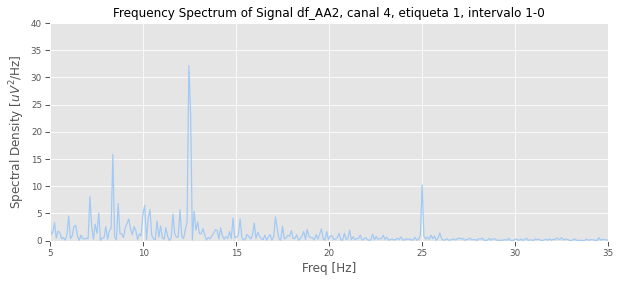

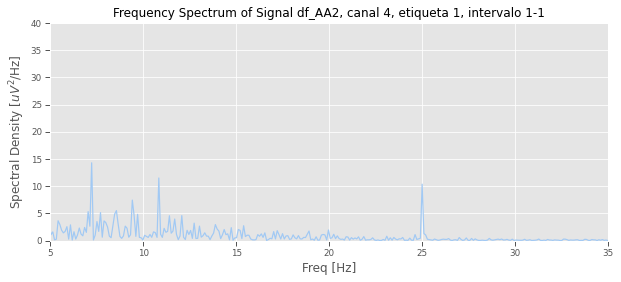

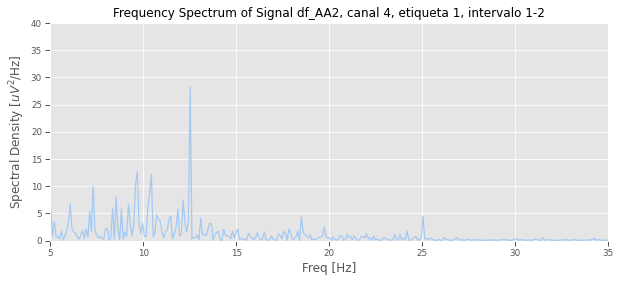

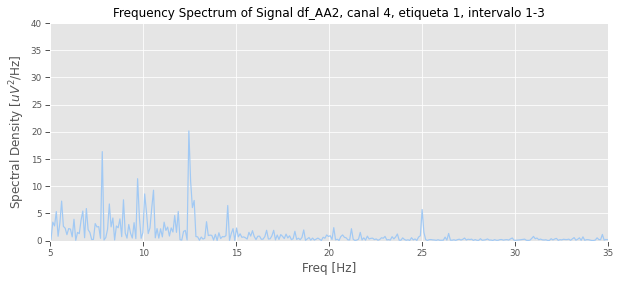

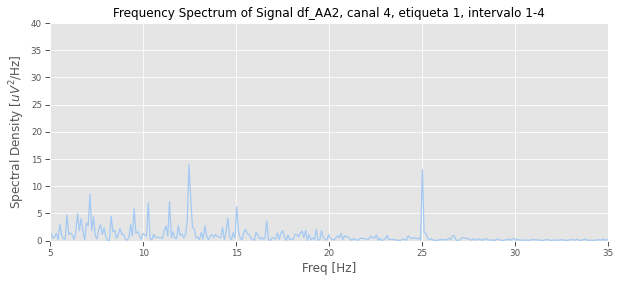

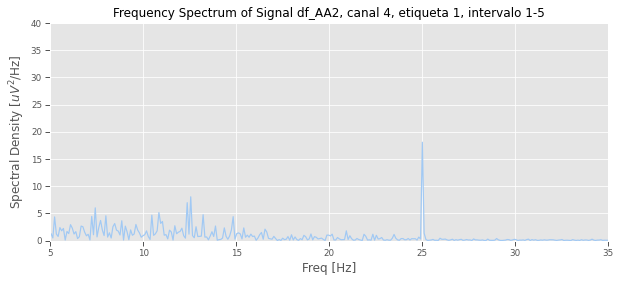

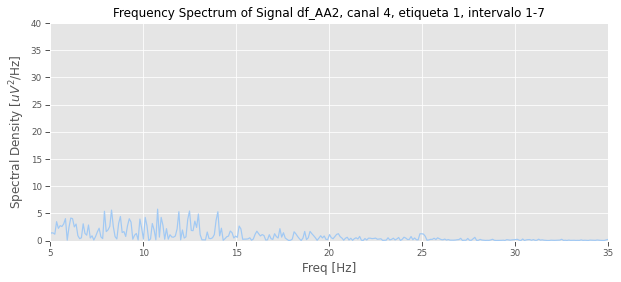

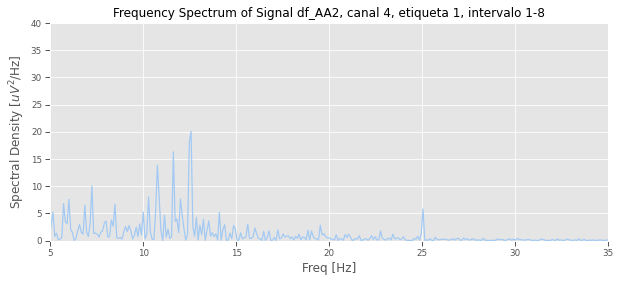

In [47]:
#a) Para cada intervalo de adquisición de cada estado, determine la frecuencia de mayor presencia relevante al problema estudiado. Ej: Un canal tiene 10 intervalos 2, para cada uno de ellos la frecuencia máxima oscila alrededor de 12.5.
#Los estados corresponden a las etiquetas, que pueden ser etiqueta 1 o 2, y cada intervalo corresponde a 10 segundos de estimulacion que son 2000 muestras.

lista=['1-0', '1-1', '1-2', '1-3', '1-4', '1-5', '1-7','1-8']

for i in lista:

  señal=df_AA2[df_AA2['sub_label']==i]
  plot_spectral(señal['canal4'], dt=dt, freq_lim = (5, 35),  amp_lim=(0,40),name='df_AA2, canal 4, etiqueta 1, intervalo '+i)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

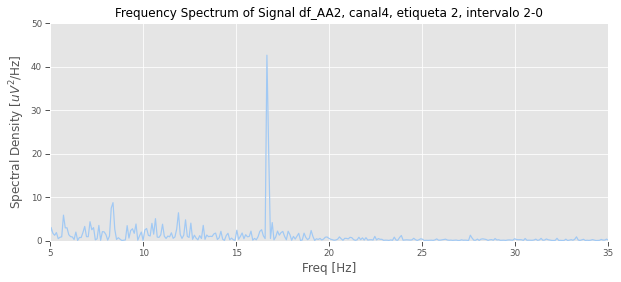

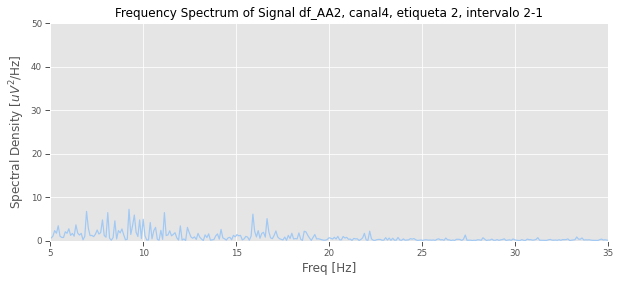

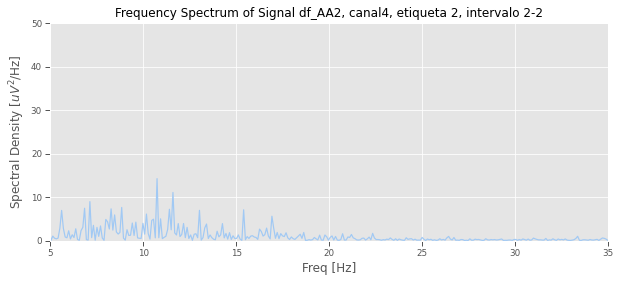

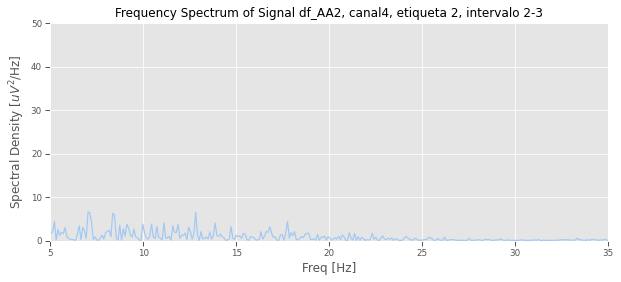

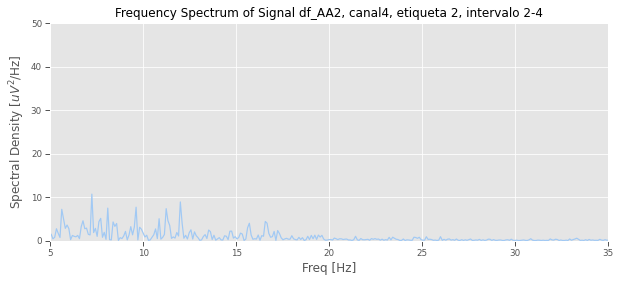

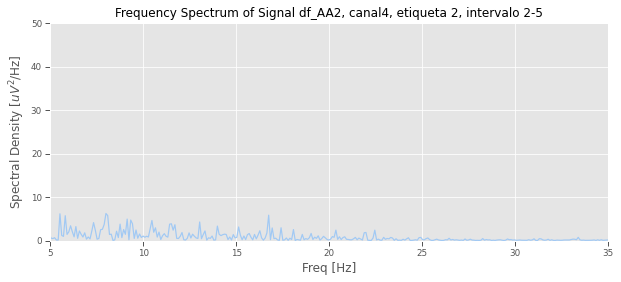

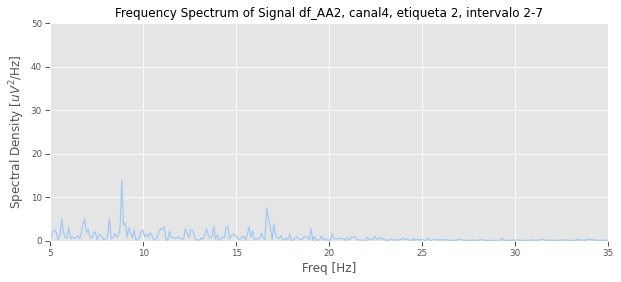

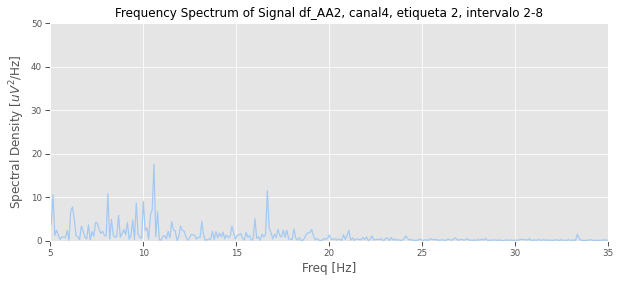

In [48]:
# Graficamos todos los intervalos de la etiqueta 2, sujeto AA2 canal 4
lista=['2-0', '2-1', '2-2', '2-3', '2-4', '2-5', '2-7','2-8']

for i in lista:

  señal=df_AA2[df_AA2['sub_label']==i]
  plot_spectral(señal['canal4'], dt=dt, freq_lim = (5, 35),  amp_lim=(0,50),name='df_AA2, canal4, etiqueta 2, intervalo '+i)

b) Realice un análisis estadístico de dichas frecuencias a lo largo de todo el conjunto de intervalos para cada clase. Determine su distribución y su resumen estadístico según considere apropiado. Ej: Siguiendo el ejemplo anterior, cómo es la distribución de esas frecuencias alrededor de 12.5 en el intervalo 2 y de la misma manera para los otros.

In [49]:
#filtramos la señal
from scipy import signal as sgn
def filt_vector(señal):
  sf = 200 #Frecuencia de muestreo
  Q=30 #calidad del filtro, es equivalente a determinar el orden del filtro Butter, indica cuán fuerte se filtra
  f_notch = 50

  b, a = sgn.iirnotch(w0=f_notch, Q=Q, fs=sf)
  sig_notch = sgn.filtfilt(b, a, señal)
  f_nq = sf/2
  f_low = 10
  f_high = 20
  order = 4

  b, a = sgn.iirfilter(N=order, Wn=[f_low/f_nq, f_high/f_nq], btype="bandpass", ftype="butter")
  sig_filt_vector = sgn.filtfilt(b, a, sig_notch)
  return sig_filt_vector

In [50]:
#filtramos las senales de todos los canales para aumentar luego los datos para hacer los resumenes estadisticos
lista_2=['2-0', '2-1', '2-2', '2-3', '2-4', '2-5','2-6' ,'2-7','2-8']
lista_1=['1-0', '1-1', '1-2', '1-3', '1-4', '1-5','1-6','1-7','1-8']


sig_filt_vect_1 = [filt_vector(df_AA2[df_AA2['sub_label']==i]['canal4']) for i in lista_1]
sig_filt_vect_1 = sig_filt_vect_1+([filt_vector(df_AA2[df_AA2['sub_label']==i]['canal1']) for i in lista_1])
sig_filt_vect_1 = sig_filt_vect_1+([filt_vector(df_AA2[df_AA2['sub_label']==i]['canal2']) for i in lista_1])
sig_filt_vect_1 = sig_filt_vect_1+([filt_vector(df_AA2[df_AA2['sub_label']==i]['canal3']) for i in lista_1])

sig_filt_vect_2 = [filt_vector(df_AA2[df_AA2['sub_label']==i]['canal4']) for i in lista_2]
sig_filt_vect_2 = sig_filt_vect_2+([filt_vector(df_AA2[df_AA2['sub_label']==i]['canal1']) for i in lista_2]) 
sig_filt_vect_2 = sig_filt_vect_2+([filt_vector(df_AA2[df_AA2['sub_label']==i]['canal2']) for i in lista_2])
sig_filt_vect_2 = sig_filt_vect_2+([filt_vector(df_AA2[df_AA2['sub_label']==i]['canal3']) for i in lista_2])


In [51]:
#calculamos la frecuencia que tiene el valor maximo de la senal
def calc_estadistico(signal):
  N = signal.shape[0]
  T = N*dt
    
  fft = np.fft.rfft(signal)
  Sxx = ((2*dt**2)/T)*fft*fft.conj()
  freqs = np.fft.rfftfreq(n=N, d=dt)
  
  
  maximum = np.max(Sxx)
  
  index_of_maximum = np.where(Sxx == maximum)
  item=freqs[index_of_maximum]
  return item[0]


In [52]:
 estadistic_1= [calc_estadistico(i) for i in sig_filt_vect_1]
 estadistic_2= [calc_estadistico(i) for i in sig_filt_vect_2]

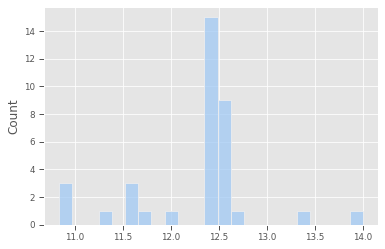

In [53]:
sns.histplot(estadistic_1)

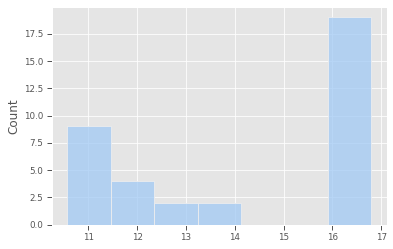

In [54]:
sns.histplot(estadistic_2)

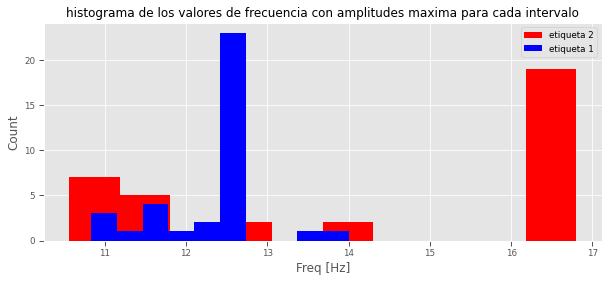

In [55]:
fig, axs = plt.subplots(1,1)
fig.set_figwidth(10)

axs.hist(estadistic_2,color='red', label= 'etiqueta 2')    
axs.hist(estadistic_1,color='blue', label= 'etiqueta 1')

axs.set_xlabel("Freq [Hz]")
axs.set_ylabel("Count")
axs.set_title("histograma de los valores de frecuencia con amplitudes maxima para cada intervalo")
axs.legend()

In [56]:
print('calculo de la media etiqueta 1 = ', np.mean(estadistic_1).round(2))
print('calculo de la mediana etiqueta 1 = ', np.median(estadistic_1).round(2))
print('calculo del desvio estandar etiqueta 1 = ', np.std(estadistic_1).round(2))
print('calculo de la varianza etiqueta 1 = ', np.var(estadistic_1).round(2))

calculo de la media etiqueta 1 =  12.28
calculo de la mediana etiqueta 1 =  12.45
calculo del desvio estandar etiqueta 1 =  0.63
calculo de la varianza etiqueta 1 =  0.4


In [57]:
print('calculo de la media etiqueta 2 = ', np.mean(estadistic_2).round(2))
print('calculo de la mediana etiqueta 2 = ', np.median(estadistic_2).round(2))
print('calculo del desvio estandar etiqueta 2 = ', np.std(estadistic_2).round(2))
print('calculo de la varianza etiqueta 2 = ', np.var(estadistic_2).round(2))

calculo de la media etiqueta 2 =  14.32
calculo de la mediana etiqueta 2 =  16.63
calculo del desvio estandar etiqueta 2 =  2.59
calculo de la varianza etiqueta 2 =  6.7


Realizando el analisis a lo largo de todos los conjuntos de intervalos, observamos que en su mayoria las muestra de mayor amplitud de señal coinciden con las frecuencia de la fuente de estimulacion. Ademas se puede ver que para las etiquetas 2 hay ruidos que ingresan en los valores maximos. Esto se da porque los valores de amplitudes no son tan grandes como los valores de etiqueta 1 generando que ruido llegue a ser valor maximo. 

c) Determine si existe una diferencia estadísticamente significativa, entre los valores centrales de frecuencias para los estados existentes.

De acuerdo a lo observado en general no hay diferencia significativas entre los valores centrales de frecuencia para los distintos intervalos de un mismo estado. Si es evidente la diferencia entre valores centrales entre intervalos de estado "etiqueta 1" (12,5 Hz) y los valores centrales de los intervalos de estado "etiqueta 2" (16,5Hz). No fue posible aplicar tecnicas estadistica debido a la poca cantidad de muestras, aunque se hizo la prueba ampliando la cantidad de puntos sumando los 4 canales de obtencion de datos.

d) ¿Son variables independientes el estado registrado de la señal y la frecuencia mayoritaria presente en el registro? Use herramientas cuantitativas y cualitativas para justificar su respuesta.

Es evidente de acuerdo a lo analizado hasta ahora que no son variables independientes el estado (etiqueta) y la frecuencia de mayo presencia en amplitud en cada registros. Señal obtenida en registros con estimulacion de luz 12,5Hz tienen como resultado una componente principal de frecuencia, o de mayor presencia en 12,5 Hz, lo mismo sucede en el caso que se estimulo con 16,5 Hz.
No fue posible utilizar herramientas estadisticas como matriz de correlacion, heatmap o test de independencia de variables debido a la poca cantidad de muestras.

e) Compute y grafique el espectrograma del registro completo. Probar con el registro filtrado y sin filtrar y comentar las diferencias. Ver link informativo, si quedan dudas conceptuales no duden en preguntar.

Una vez realizados ambo espectrogramas, observamos que en el caso que no filtramos la señal se visualiza con una amplia intensidad a lo largo de todo el registro la componente de 50Hz (antes mencionada), tambien se observa con alta intencsidad y a lo largo de todo el registro la componente de continua en 0 Hz.

En el espectrograma de la señal filtrada logran visualizarse ambas componente de 12,5 Hz  y 16,5 Hz (por periodos de 10 segundos). Tambien algo de ruido al comienzo del registro correspondiente a etiqueta 99.

In [58]:
# Definimos la señal a usar y generamos funcionpara graficar espectograma de canal4 completo, sujeto AA2, con el registro sin fltrar.

señal2=df_AA2['canal4']

from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from scipy.io import loadmat
from math import log

def grafico_espectrograma (sig_espec,Frec_s, ylim):

 Fs = Frec_s              # Define the sampling frequency,
 interval = int(Fs)        # ... the interval size,
 overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
 f, t, Sxx = spectrogram(
    sig_espec,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,


 fig=plt.figure(figsize=(20,3))


 plt.pcolormesh(t, f, Sxx,cmap='jet',vmax=4,shading='gouraud')# Plot the result
 plt.ylabel('Frequency [Hz]')
 plt.xlabel('Time [sec]')
 plt.ylim(ylim)
 plt.title("Espectrograma de la señal de un individuo, un canal, ambos estados filtrando la señal")
 plt.colorbar().set_label(u'Intensidad')

 plt.axhline(12.5, c='w', ls='-.', alpha=0.8)
 plt.axhline(16.5, c='w', ls='-.', alpha=0.8)

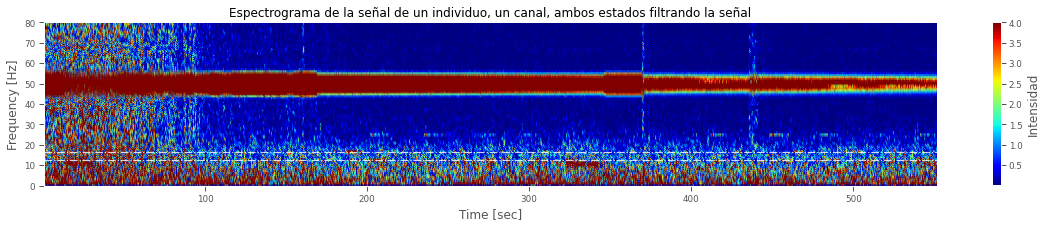

In [62]:
grafico_espectrograma(señal2,200, [0,80])

In [67]:
#filtramos la señal
from scipy import signal as sgn

sf = 200 #Frecuencia de muestreo
Q=30 #calidad del filtro, es equivalente a determinar el orden del filtro Butter, indica cuán fuerte se filtra
f_notch = 50

b, a = sgn.iirnotch(w0=f_notch, Q=Q, fs=sf)
sig_notch = sgn.filtfilt(b, a, señal2)
f_nq = sf/2
f_low = 11
f_high = 18
order = 4

b, a = sgn.iirfilter(N=order, Wn=[f_low/f_nq, f_high/f_nq], btype="bandpass", ftype="butter")
sig_filt = sgn.filtfilt(b, a, sig_notch)

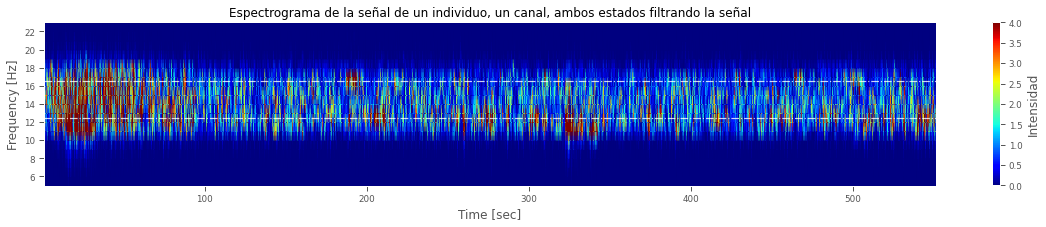

In [69]:
grafico_espectrograma(sig_filt,200,[5,23])

f) Resuma las principales conclusiones de este nivel de análisis.



Como principales conclusiones podemos mencionar:

- Afirmar que existe una relacion entre la frecuencia de las fuentes de estimulacion y las componentes de mayor amplitud obtenidas en el analisis en frecuencias de las señales del cerbro obtenidas de experimento.

- Que las señales obtenidad en uV en el experimento son muy sensibles a artefactos externos.

- Un buen metodo para identificar las componentes en frecuencia con mayor amplitud o intensidad en la señal anlizada son el espectrograma y el grafico de frecuencia vs. densidad espectral.

- Un meto eficiente en el dominio de la frecuencia para limpiar nuestros datos es el filtrado en frecuencia quedandonos con el segmento de frecuencia que nos interesa analizar de acuerdo al conocimiento de dominio.

####C) Nivel Paciente - multi canal: Seleccione los datos correspondientes a un paciente y para ese caso estudie los siguientes elementos:
#####a) Compute el espectrograma para cada canal, y compárelos. ¿A simple vista, existe alguna correlación?

Se realizaron los espectrogramas del individuo AA tercera sesión para todos los canales.
Se observa que al introducir las señales con todas las etiquetas, se introduce ruido en las mismas en los primeros intervalos de tiempo. Se puede mencionar que a simple puede existir una correlación entre los canales al ser similares en la información brindada.


#####b) A partir de la respuesta anterior. ¿Considera relevante trabajar con todos los canales disponibles o podría quedarse con un subconjunto?

Se concluye que los canales presentan niveles de información similar entre ellos, por lo que se podría utilizar un solo canal para realizar el consecuente análisis de ciencia de datos.


#####c) Resuma las principales conclusiones de este nivel de análisis.

Como conclusión comentamos nuevamente que se puede utilizar un solo canal para el análisis posterior de ciencia de datos.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


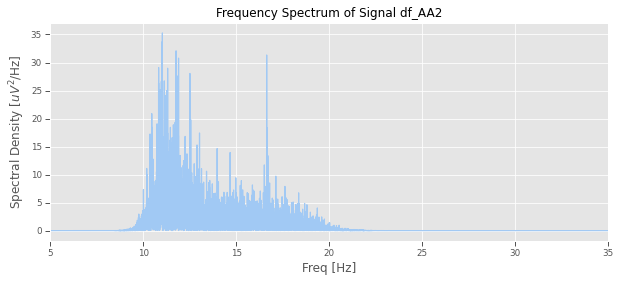

In [70]:
sig_filt_all=filt_signal(sig_np,10,20)

plot_spectral(sig_filt_all[0], dt=dt, freq_lim = (5,35), amp_lim=None, name='df_AA2')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


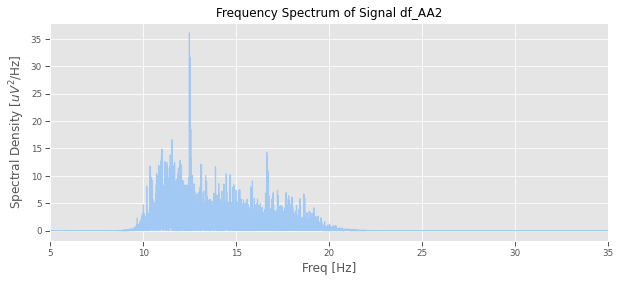

In [71]:
plot_spectral(sig_filt_all[3], dt=dt, freq_lim = (5,35), amp_lim=None, name='df_AA2')

In [72]:
# graficamos espectograma

from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from scipy.io import loadmat
from math import log

def plot_spectrogram(sig_filt,canal):
  Fs = 200              # Define the sampling frequency,
  interval = int(Fs)        # ... the interval size,
  overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
  f, t, Sxx = spectrogram(
    sig_filt,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,

  fig, ax0 = plt.subplots(1,1,figsize=(20,3))

  im=ax0.pcolormesh(t, f, Sxx,cmap='jet',vmax=3,shading='gouraud')# Plot the result

  ax0.set_ylim([9, 20])
  ax0.set_ylabel('Frequency [Hz]')
  fig.colorbar(im).set_label(u'Intensidad (uV)')
  ax0.set_xlabel('Time [s]')
  ax0.set_title("Espectrograma de la señal de individuo AA2, "+canal)
  ax0.axhline(12.5, c='w', ls='-.', alpha=1)
  ax0.axhline(16.5, c='w', ls='-.', alpha=1)


  sns.despine()
  plt.legend()
  plt.show()

In [73]:

sig_filt_all= np.array(sig_filt_all, dtype=float)

No handles with labels found to put in legend.


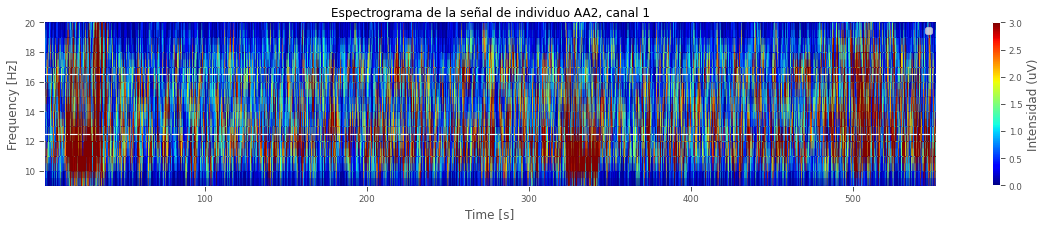

In [74]:
plot_spectrogram(sig_filt_all[0], canal='canal 1')

No handles with labels found to put in legend.


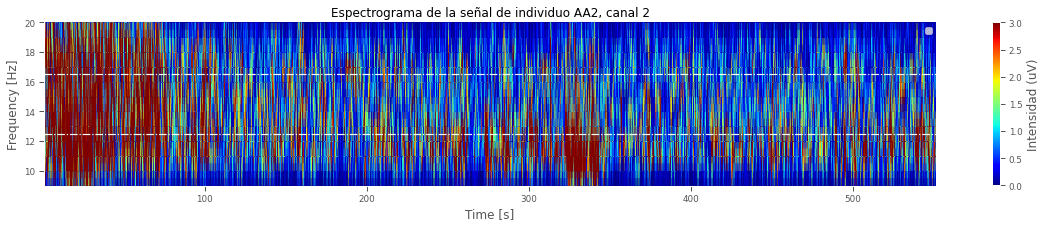

In [75]:
plot_spectrogram(sig_filt_all[1] , canal='canal 2')

No handles with labels found to put in legend.


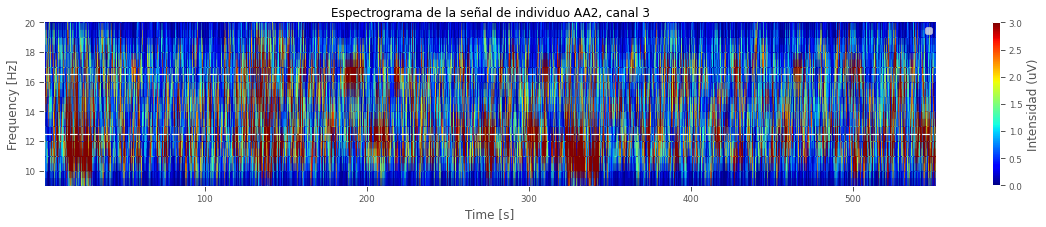

In [76]:
plot_spectrogram(sig_filt_all[2], canal='canal 3')

No handles with labels found to put in legend.


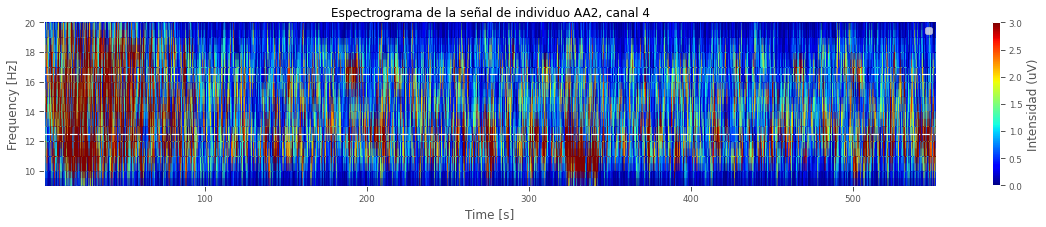

In [77]:
plot_spectrogram(sig_filt_all[3],  canal='canal 4')

####D) Nivel Multi-Paciente.
#####a) A partir de las conclusiones extraídas de los niveles de análisis anteriores. Decida cuáles son los aspectos más importantes a analizar de los registros de un paciente y compárelos entre pacientes. ¿Encuentra diferencias significativas entre pacientes?

Para realizar una comparación entre pacientes se propone tomar un intervalo con el mismo estado y un canal, en distinto paciente. Con eso podemos comparar la amplitud de las señales en cada individuo. Se cree que si se toma todo un intervalo que contenga ambos estados se va a incluir etiquetas 99 donde aparezca mucho ruido para el análisis, por ende se prefiere hacerlo por separado.


In [78]:
labels_MA1 = df_MA1.pop("etiqueta").values
sig_np_MA1 = df_MA1.values.T

labels_JA1 = df_JA1.pop("etiqueta").values
sig_np_JA1 = df_JA1.values.T

In [79]:
label_one_MA1 = detect_first_label(labels_MA1, 1)
print("Checking:", labels_MA1[label_one_MA1-3:label_one_MA1+4])
label_one_JA1 = detect_first_label(labels_JA1, 1)
print("Checking:", labels_JA1[label_one_JA1-3:label_one_JA1+4])

Checking: [99 99 99  1  1  1  1]
Checking: [99 99 99  1  1  1  1]


In [80]:
sig_filt_1_MA1=filt_signal(sig_np_MA1,8,20)
sig_filt_1_JA1=filt_signal(sig_np_JA1,8,20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


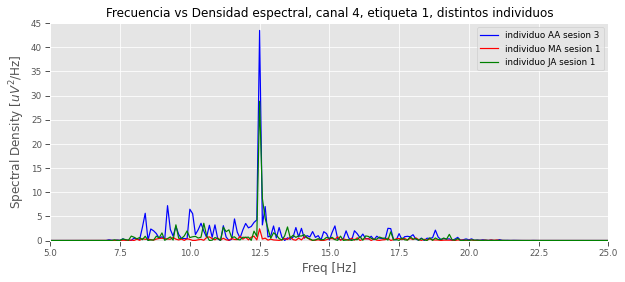

In [81]:
plot_three_spectral(sig_filt_1[3, label_one:label_one+2000],
                    sig_filt_1_MA1[3, label_one_MA1:label_one_MA1+2000] ,
                    sig_filt_1_JA1[3, label_one_JA1:label_one_JA1+2000] ,
                    label_1='individuo AA sesion 3',label_2='individuo MA sesion 1',label_3='individuo JA sesion 1',
                    dt=dt, freq_lim = (5,25), amp_lim=(0,45), name='canal 4, etiqueta 1, distintos individuos')

Se puede observar como varía la amplitud en la frecuencia de estimulación 12,5 Hz para cada paciente. Pero que en los mismos aparece el pico de señal a la frecuencia de estimulación.


####E) Comparando con el Trabajo Práctico anterior.
#####a) ¿Cambia la complejidad del análisis según el dominio en el que se estudien los datos?

Creemos que es más complejo la comprensión de los datos en el dominio de la frecuencia para quien no comprende del tema, pero que una vez entendido este dominio ofrece mucha más información para diferenciar los estados (objetivo final), que en el dominio del tiempo.


#####b) Pensando en un problema de clasificación supervisada, ¿resulta más cómodo trabajar los datos en uno de los dos dominios?
Por la información brindada en el dominio de la frecuencia creemos que el problema de clasificación supervisada va a ser más eficiente utilizando como entrada los datos resultantes de este análisis. Ya que en el dominio del tiempo le va a ser más dificultoso encontrar diferencias entre los estados.

